In [23]:
#Let's first Import libraries 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [24]:
#Load your LinkedIn dataset 
df = pd.read_csv("linkedin_data.csv")
df.head()

,First Name,Last Name,Company,Position,Connected On
0,Anastasia,Gorina,Prime Clerk,Data Analyst,22 Feb 2021
1,Michael,Duncan,DispatchHealth,Jr. Machine Learning Engineer,22 Feb 2021
2,Cansu,CANDAN,KTU Artificial Intelligence Society,Member Of The Management Board,22 Feb 2021
3,Richard,Pisano,Springboard,Data Analyst,22 Feb 2021
4,Arbak,Aydemir,Apple,AI/ML - Annotation Analyst,22 Feb 2021


In [25]:
#Descriptive Statistics
df.describe()

,First Name,Last Name,Company,Position,Connected On
count,1029,1029,952,952,1034
unique,908,902,800,674,223
top,Andrew,Kumar,"The Chinese University of Hong Kong, Shenzhen ...",Data Scientist,26 Aug 2020
freq,7,9,30,76,67


In [26]:
# Convert the 'Connected On' column to datetime format
df["Connected On"] = pd.to_datetime(df["Connected On"])
df["Connected On"]

0      2021-02-22
1      2021-02-22
2      2021-02-22
3      2021-02-22
4      2021-02-22
          ...    
1029   2020-05-21
1030   2020-05-21
1031   2020-05-21
1032   2020-05-21
1033   2020-05-16
Name: Connected On, Length: 1034, dtype: datetime64[ns]

# visualize the number of connections on a given date

In [27]:
fig1 = px.line(df.groupby(by="Connected On").count().reset_index(), 
               x="Connected On", 
               y="First Name", 
               labels={"First Name": "Count"},
               title="Number of Connections on a Given Date")
fig1.show()

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



# Group and sort the data by company 

In [28]:
df_by_com= df.groupby(by="Company").count().reset_index().sort_values(by="First Name",ascending=False).reset_index(drop=True)
df_by_com

,Company,First Name,Last Name,Position,Connected On
0,"The Chinese University of Hong Kong, Shenzhen ...",30,30,30,30
1,The Sparks Foundation,12,12,12,12
2,Perhimpunan Pelajar Indonesia (PPI) Tiongkok,12,12,12,12
3,Towards Data Science,12,12,12,12
4,Amazon,7,7,7,7
...,...,...,...,...,...
795,Hangzhou Indonesian Student Community,1,1,1,1
796,Happy Chinese World,1,1,1,1
797,Heap,1,1,1,1
798,Helium 10,1,1,1,1


# Create a bar plot for the top companies

In [37]:
fig2 = px.bar(df_by_com[:12],
              x="Company",
              y="First Name",
              labels={"First Name": "Count"},
              title="Top Companies in my Network")
fig2.show()

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



C:\Users\Data Scientist\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 39321 (\N{CJK UNIFIED IDEOGRAPH-9999}) missing from current font.

C:\Users\Data Scientist\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 28207 (\N{CJK UNIFIED IDEOGRAPH-6E2F}) missing from current font.

C:\Users\Data Scientist\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.

C:\Users\Data Scientist\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.

C:\Users\Data Scientist\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.

C:\Users\Data Scientist\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) mi

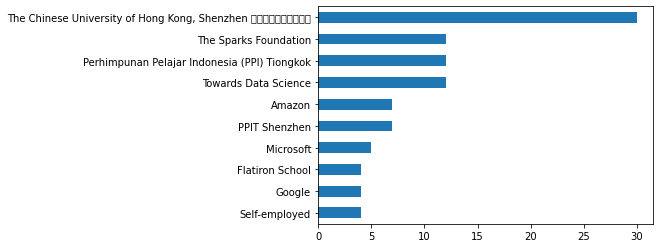

In [30]:
df['Company'].value_counts().head(10).plot(kind="barh").invert_yaxis();

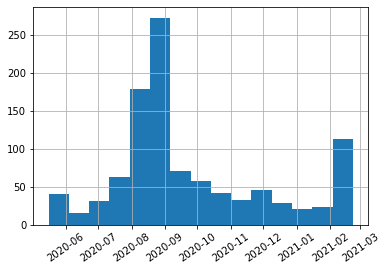

In [31]:
#Find the active time using histogram
df['Connected On'].hist(xrot=35, bins=15);

# Create a treemap for the top companies

In [32]:
fig3 = px.treemap(df_by_com[:100], path=["Company", "Position"],
                 values="First Name",
                 labels={"First Name": "Count"})
fig3.show()


C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [33]:
#Group and sort the data by position 
df_by_position = df.groupby(by="Position").count().reset_index().sort_values(by="First Name", ascending=False).reset_index(drop=True)
df_by_position

,Position,First Name,Last Name,Company,Connected On
0,Data Scientist,76,76,76,76
1,Machine Learning Engineer,18,18,18,18
2,Data Analyst,17,17,17,17
3,Founder,15,15,15,15
4,Data Science Intern,12,12,12,12
...,...,...,...,...,...
669,Economic Analyst,1,1,1,1
670,Editor,1,1,1,1
671,Editor In Chief,1,1,1,1
672,Editor and Writer,1,1,1,1


In [34]:
#Create a bar plot for the top positions
fig4 = px.bar(df_by_position[:20],
              x="Position",
              y="First Name",
              labels={"First Name": "Count"},
              title="Top Positions in my Network")
fig4.show()

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



# Create a treemap for the top positions

In [35]:
fig5 = px.treemap(df_by_position[:100], path=["Position", "Company"],
                 values="First Name",
                 labels={"First Name": "Count"})
fig5.show()

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Data Scientist\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



# Find all positions that contains 'Data Scientist'

In [36]:
df["Position"].str.contains("Data Scientist").sum()

129